# PDIE8 - Processamento Digital de Imagem

![Capa](https://m.media-amazon.com/images/I/71wa841+qgL._AC_UF1000,1000_QL80_.jpg)

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Vinicius de Souza Santos
#### Lecionado por: Murilo Varges

## Aula 10 - 02/10 - Morfologia Matemática

### Morfologia 

* Erosão
* Dilatação
* Abertura
* Fechamento

### Trabalho Morfologia

Caminho das Imagens imagens

In [33]:
paths = [
    '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 10 - Trabalho Morfologia/img/{}.tif'.format(i) 
    for i in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
]

Importando Bibliotecas

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Lendo as Imagens

In [35]:
# Ler as imagens em escala de cinza
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in paths]

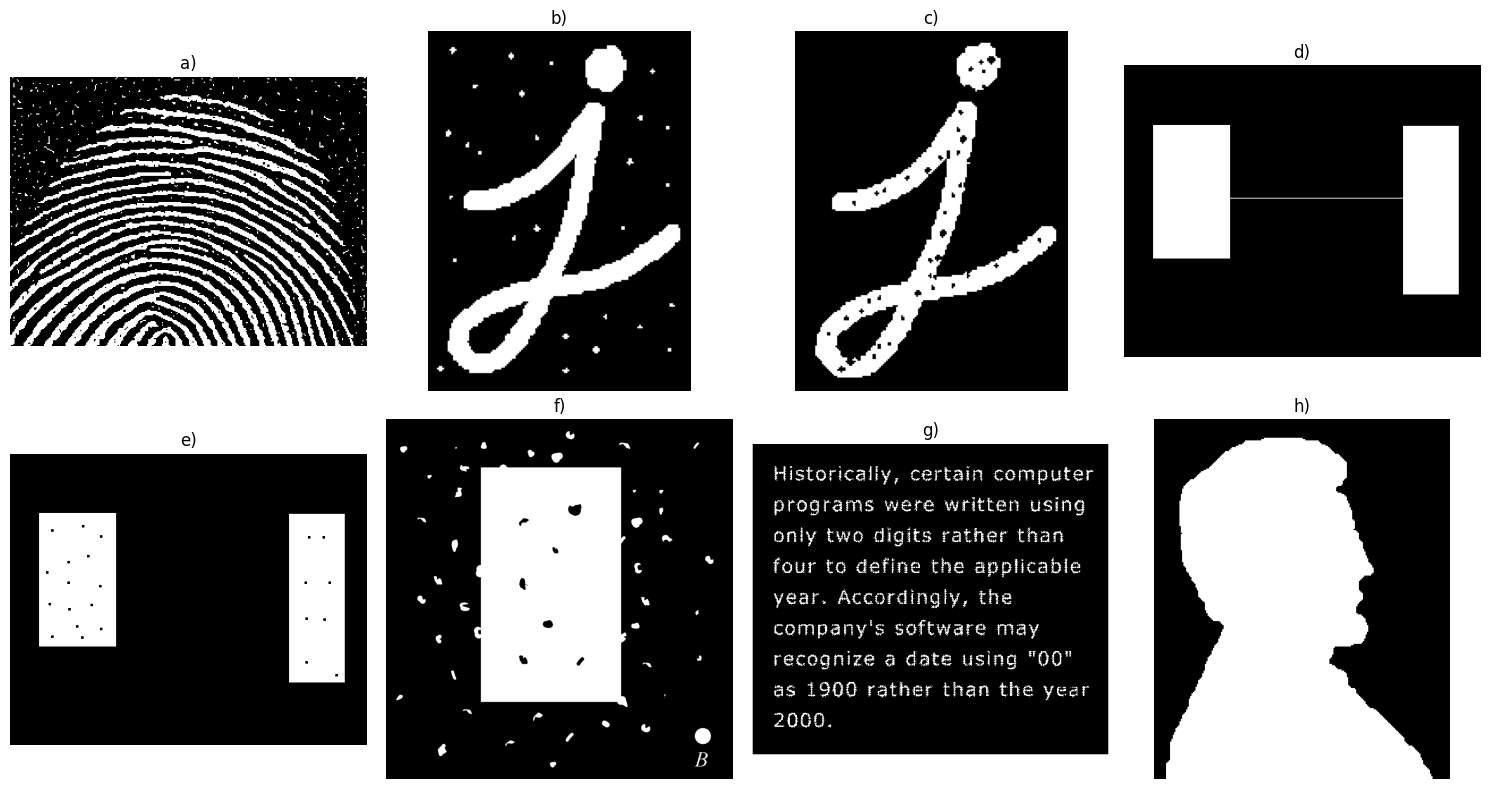

In [25]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 8))

# Exibindo as imagens
for idx, img in enumerate(images):
    plt.subplot(2, 4, idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(chr(97 + idx) + ')')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Exercicio

1) Implemente a erosão/dilatação utilizando os seguintes elementos estruturantes e utilize todas as imagens: 

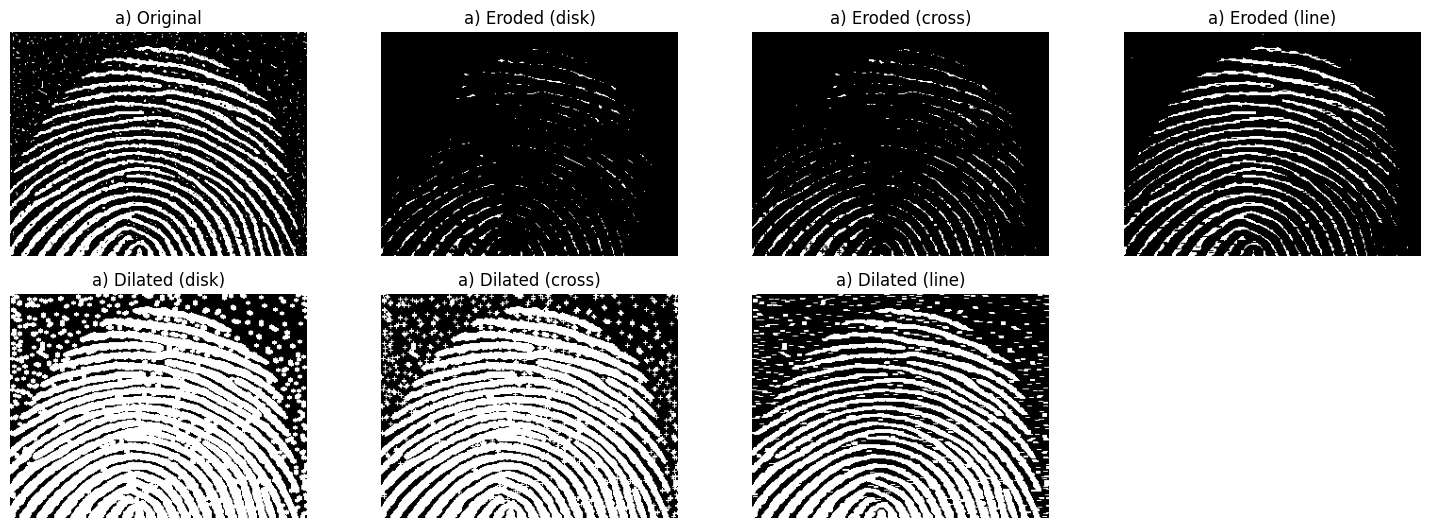

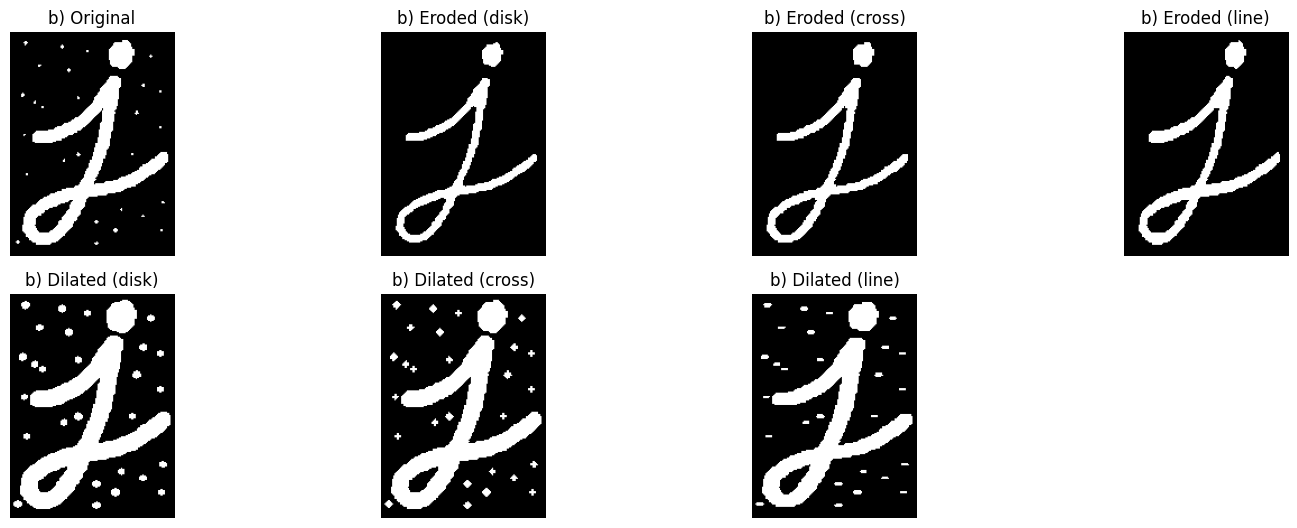

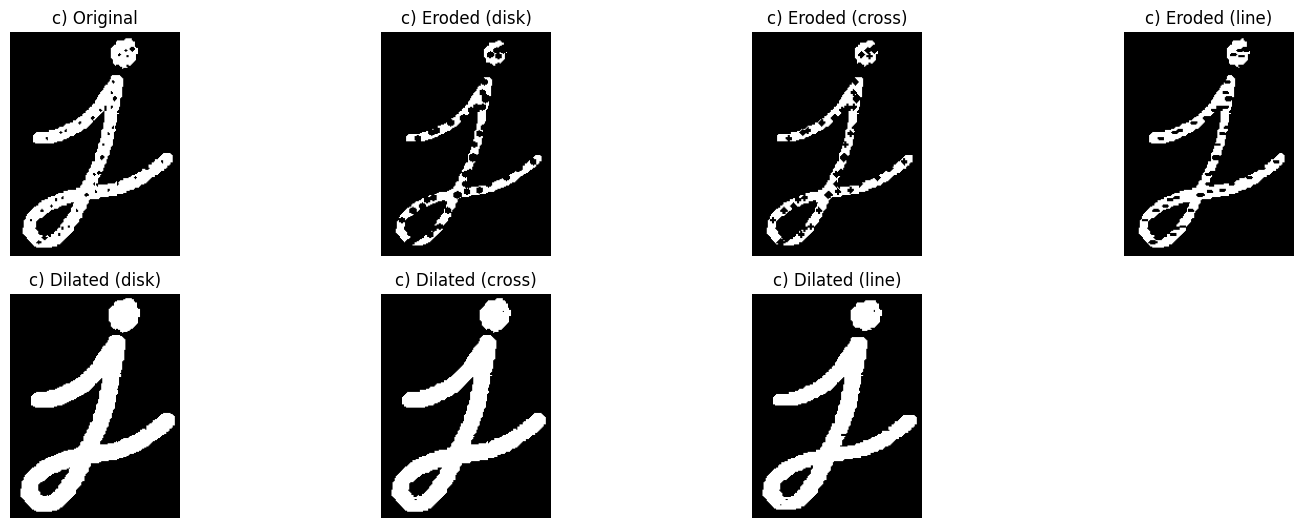

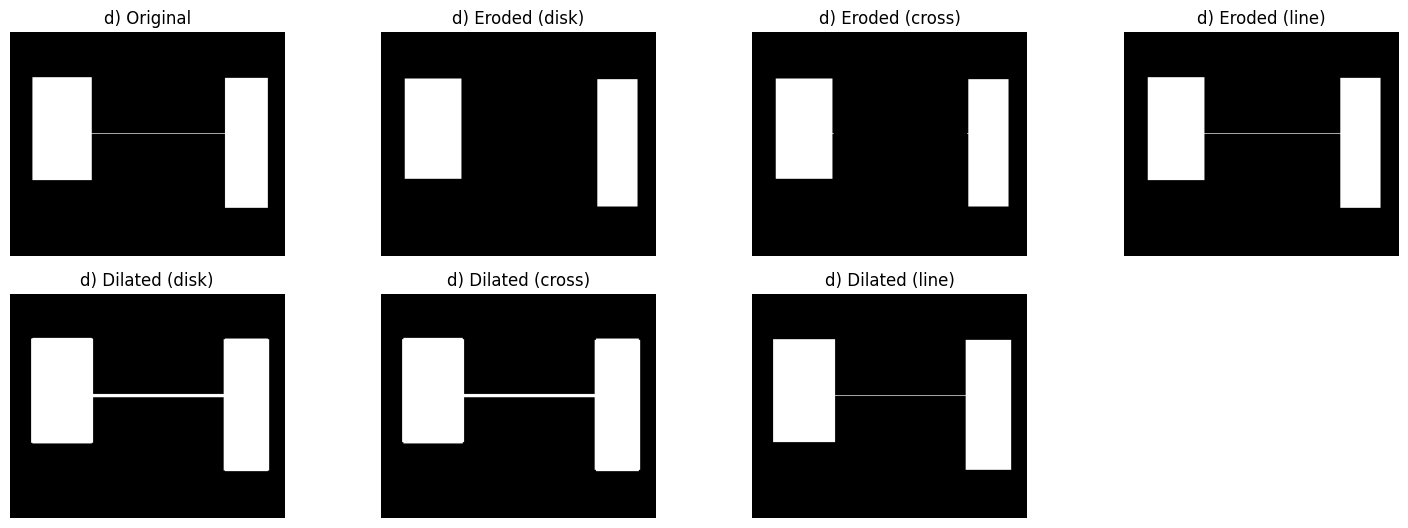

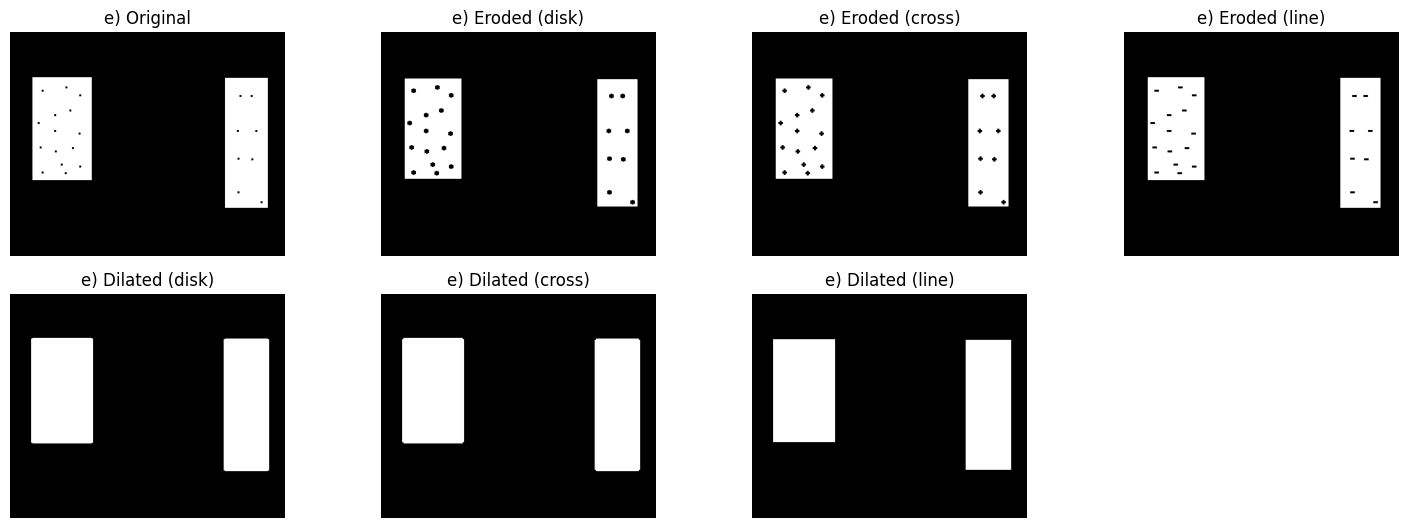

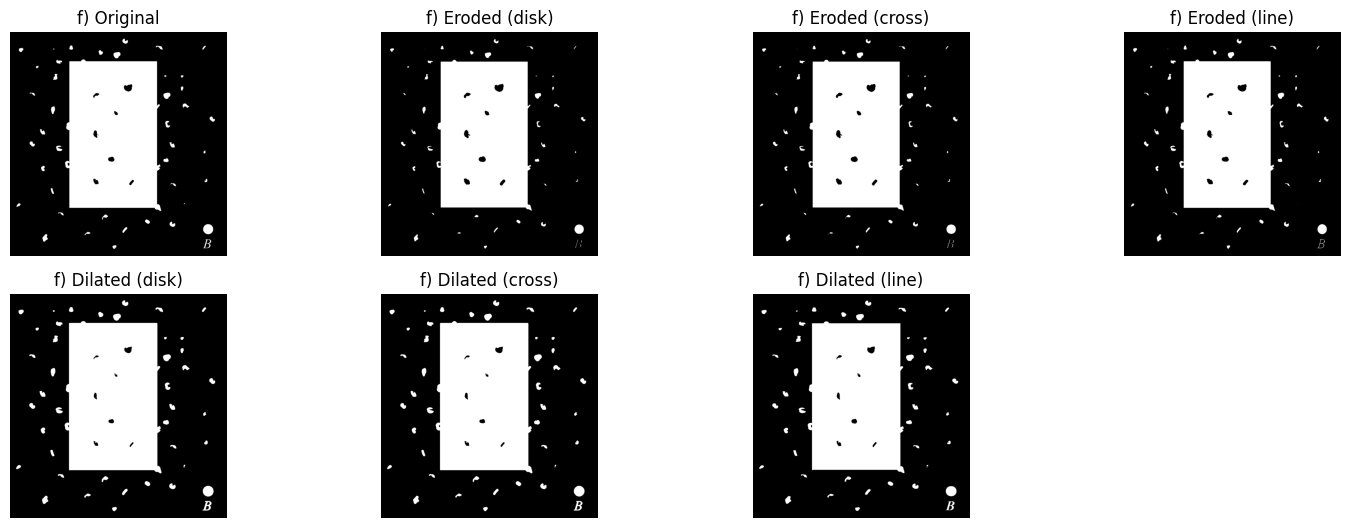

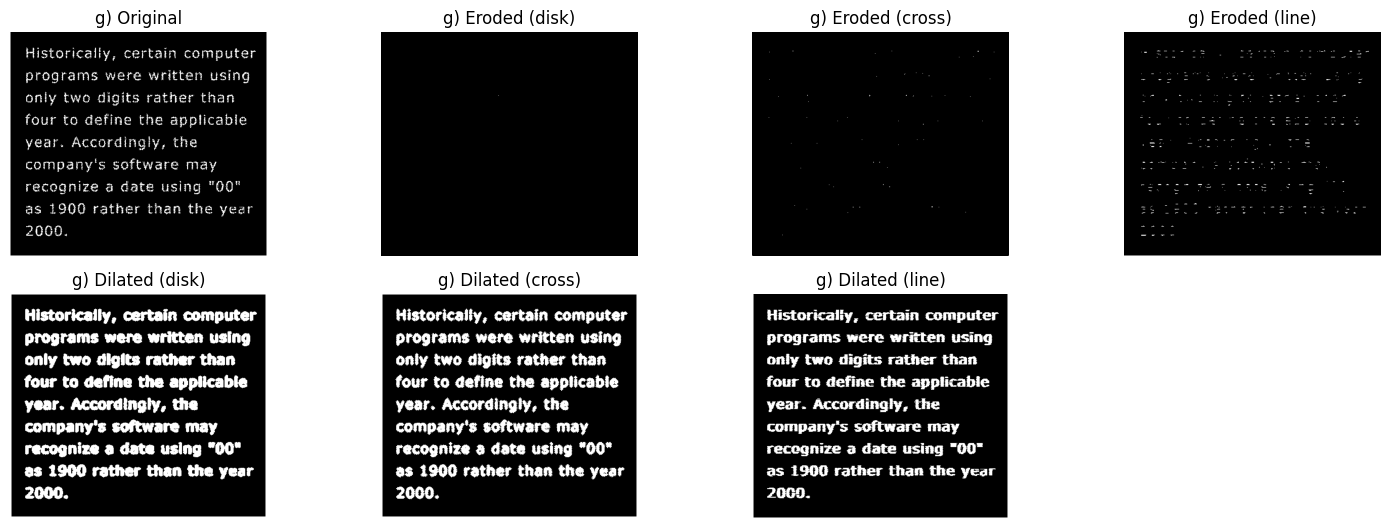

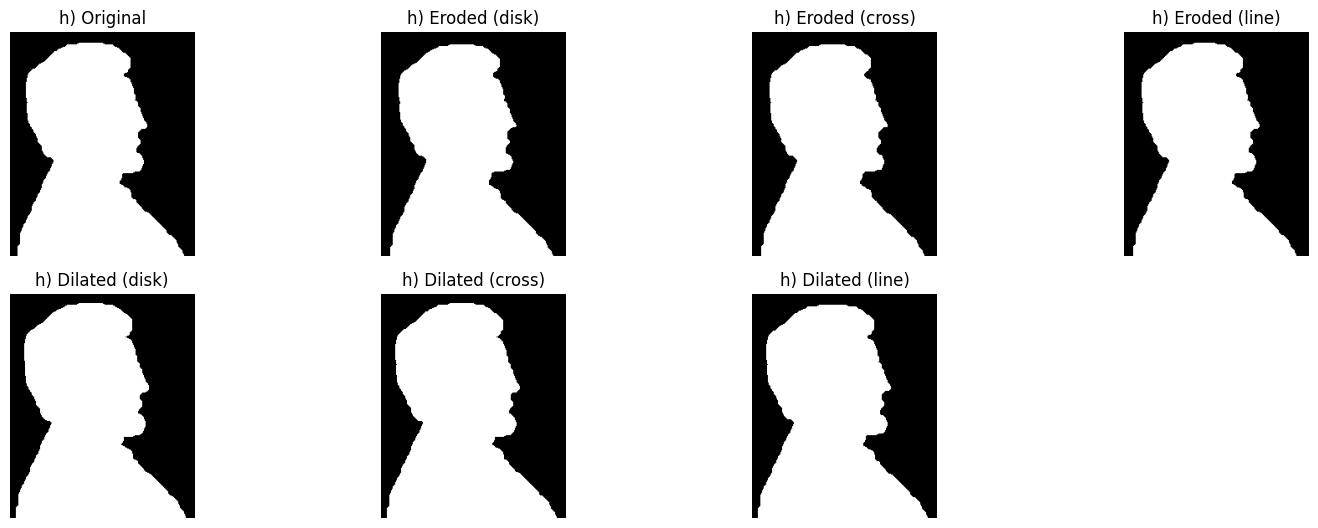

In [30]:
# Definindo os elementos estruturantes
se_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
se_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
se_line = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))  # Linha horizontal

# Iterando sobre cada imagem
for idx, img in enumerate(images):
    plt.figure(figsize=(15, 8))

    # Erosão
    img_eroded_disk = cv2.erode(img, se_disk)
    img_eroded_cross = cv2.erode(img, se_cross)
    img_eroded_line = cv2.erode(img, se_line)

    # Dilatação
    img_dilated_disk = cv2.dilate(img, se_disk)
    img_dilated_cross = cv2.dilate(img, se_cross)
    img_dilated_line = cv2.dilate(img, se_line)

    # Subplot 1: Imagem original
    plt.subplot(3, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title(chr(97 + idx) + ') Original')
    plt.axis('off')

    # Subplots 2-4: Imagens erodidas
    for i, eroded in enumerate([img_eroded_disk, img_eroded_cross, img_eroded_line]):
        plt.subplot(3, 4, i+2)
        plt.imshow(eroded, cmap='gray')
        plt.title(chr(97 + idx) + f') Eroded ({["disk", "cross", "line"][i]})')
        plt.axis('off')

    # Subplots 5-7: Imagens dilatadas
    for i, dilated in enumerate([img_dilated_disk, img_dilated_cross, img_dilated_line]):
        plt.subplot(3, 4, i+5)
        plt.imshow(dilated, cmap='gray')
        plt.title(chr(97 + idx) + f') Dilated ({["disk", "cross", "line"][i]})')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


2) Implemente as operações de abertura e fechamento utilizando apenas o primeiro elemento estruturante do exercício acima. Considerando as imagens de b) a e) quais imagens seria mais interessante utilizar a abertura e quais o fechamento para remover os ruídos? 

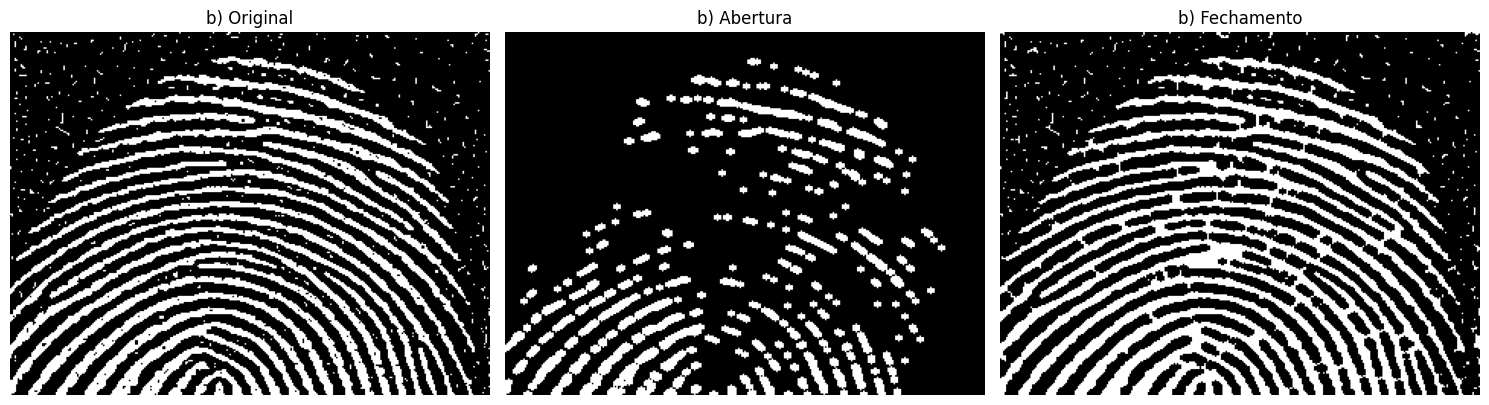

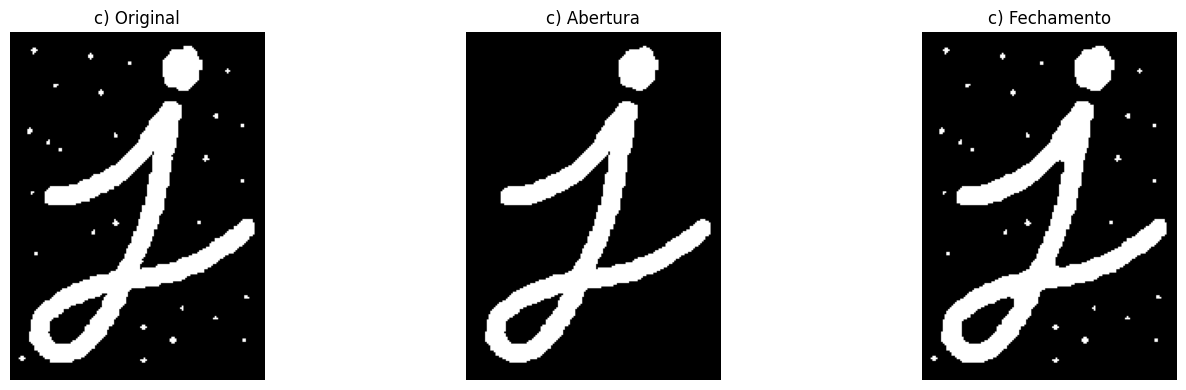

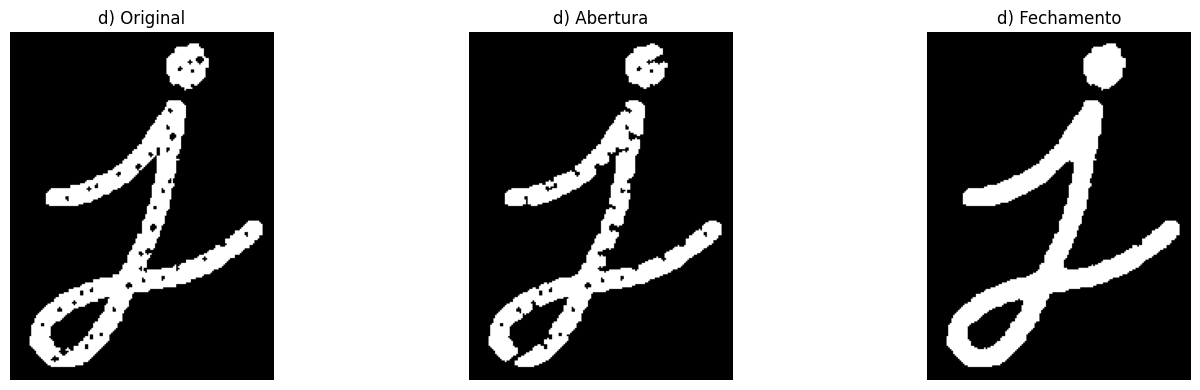

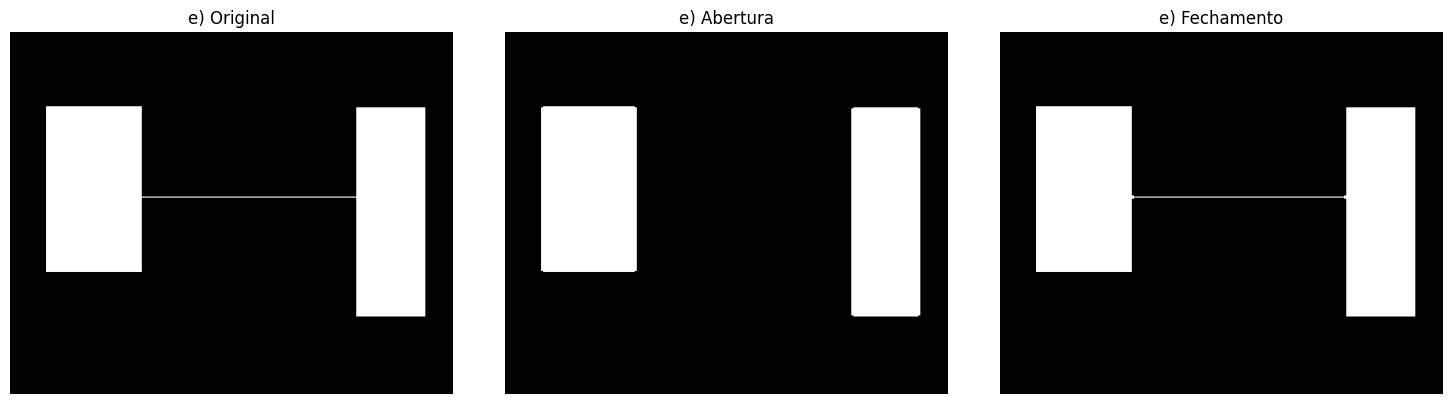

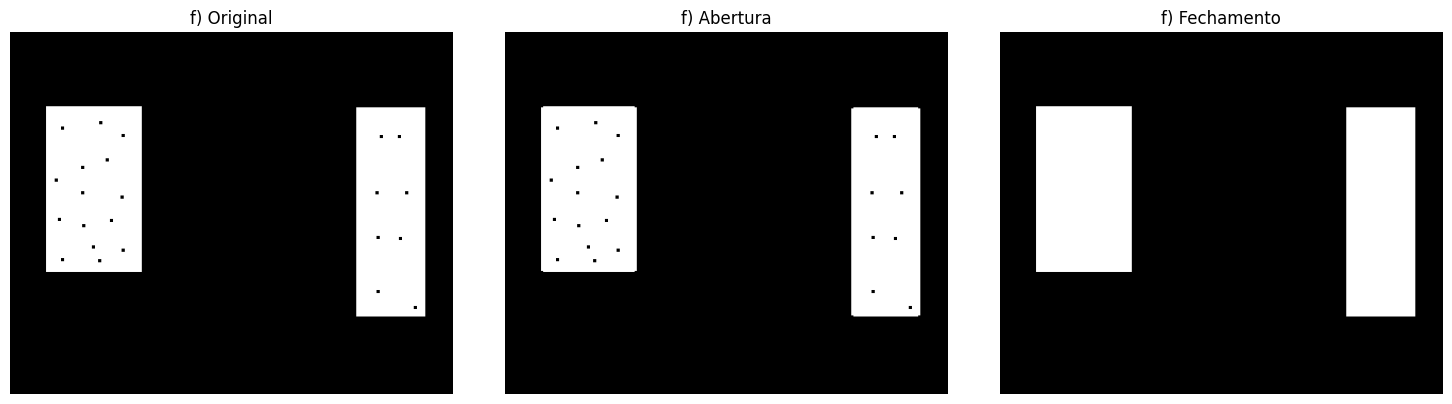

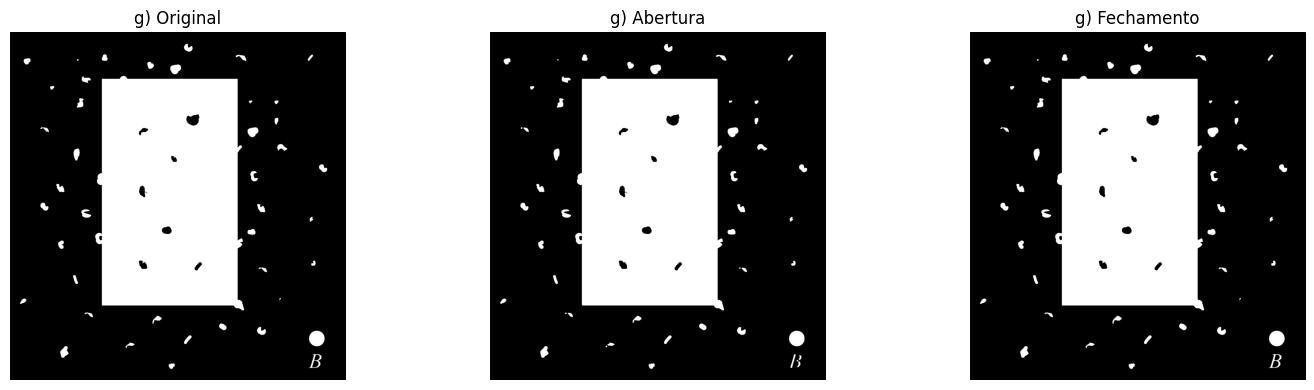

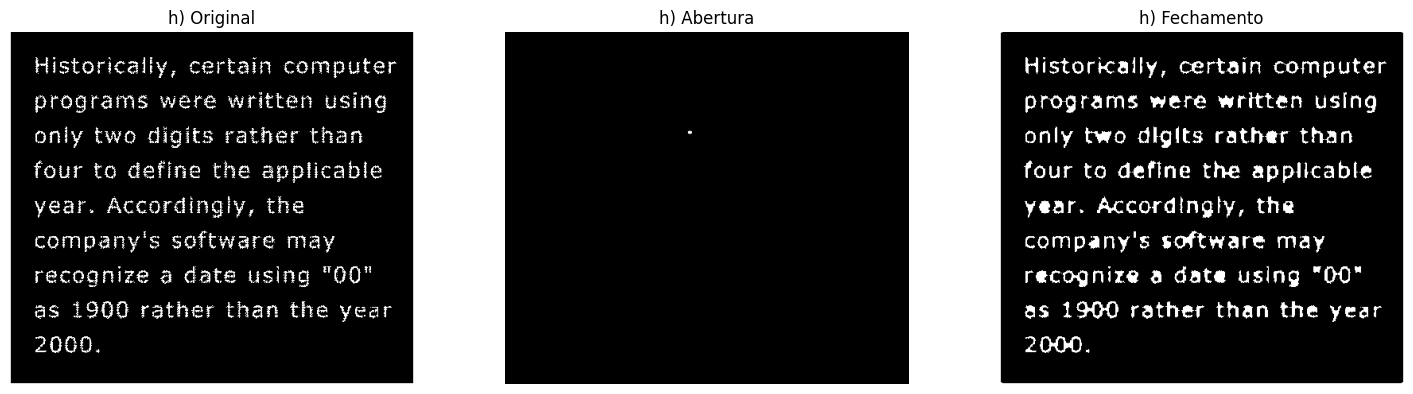

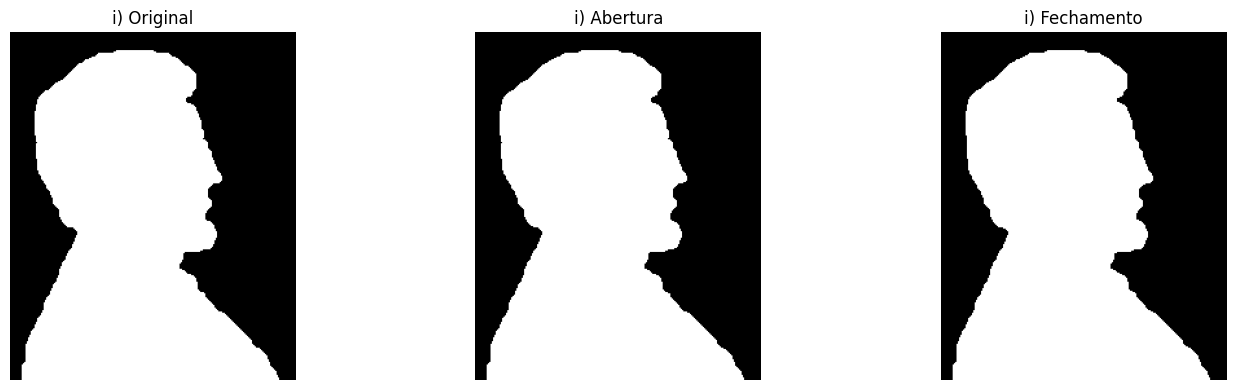

In [36]:

# Definindo o elemento estruturante
se_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Iterando sobre cada imagem
for idx, img in enumerate(images):
    plt.figure(figsize=(15, 4))

    # Abertura
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, se_disk)

    # Fechamento
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se_disk)

    # Subplot 1: Imagem original
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(chr(98 + idx) + ') Original')
    plt.axis('off')

    # Subplot 2: Imagem após abertura
    plt.subplot(1, 3, 2)
    plt.imshow(img_open, cmap='gray')
    plt.title(chr(98 + idx) + ') Abertura')
    plt.axis('off')

    # Subplot 3: Imagem após fechamento
    plt.subplot(1, 3, 3)
    plt.imshow(img_close, cmap='gray')
    plt.title(chr(98 + idx) + ') Fechamento')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


3) Qual sequência de operações poderia ser realizadas para que a imagem f) ficasse apenas com um retângulo branco ao centro? Implemente essas operações.

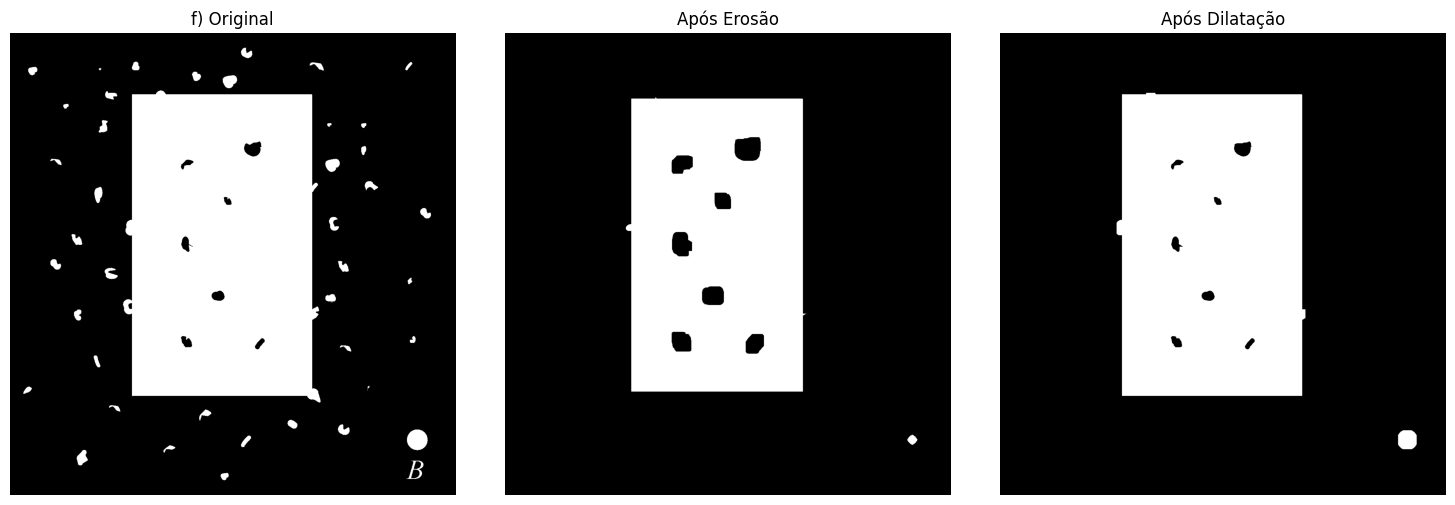

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ler a imagem f) em escala de cinza
path_f = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 10 - Trabalho Morfologia/img/f.tif'
image_f = cv2.imread(path_f, cv2.IMREAD_GRAYSCALE)

# Definindo o elemento estruturante
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

# Erosão seguida de dilatação
img_eroded = cv2.erode(image_f, se_rect)
img_dilated = cv2.dilate(img_eroded, se_rect)

# Exibição das imagens
plt.figure(figsize=(15, 5))

# Subplot 1: Imagem original
plt.subplot(1, 3, 1)
plt.imshow(image_f, cmap='gray')
plt.title('f) Original')
plt.axis('off')

# Subplot 2: Imagem após erosão
plt.subplot(1, 3, 2)
plt.imshow(img_eroded, cmap='gray')
plt.title('Após Erosão')
plt.axis('off')

# Subplot 3: Imagem após dilatação
plt.subplot(1, 3, 3)
plt.imshow(img_dilated, cmap='gray')
plt.title('Após Dilatação')
plt.axis('off')

plt.tight_layout()
plt.show()


4) Qual(is) operações seriam necessárias para melhorar a imagem g)? Implemente essa(s) operação(ões). 

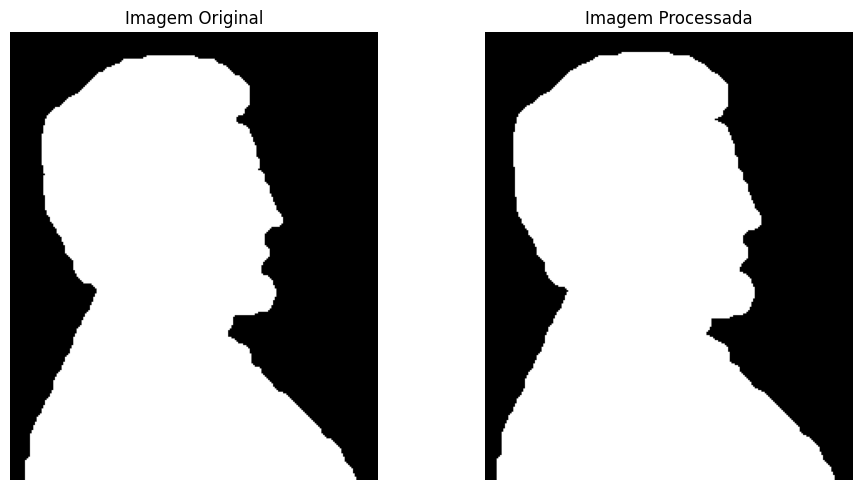

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregando a imagem g)
img_g = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 10 - Trabalho Morfologia/img/h.tif', cv2.IMREAD_GRAYSCALE)

# Elemento estruturante (se_disk)
se_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Dilatação para melhorar o texto
img_processed = cv2.dilate(img_g, se_disk)

# Exibindo a imagem original e a imagem processada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_g, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_processed, cmap='gray')
plt.title('Imagem Processada')
plt.axis('off')

plt.tight_layout()
plt.show()

5) Quais operações seriam necessárias para extrair apenas a borda da imagem h)? Implemente essas operações. 

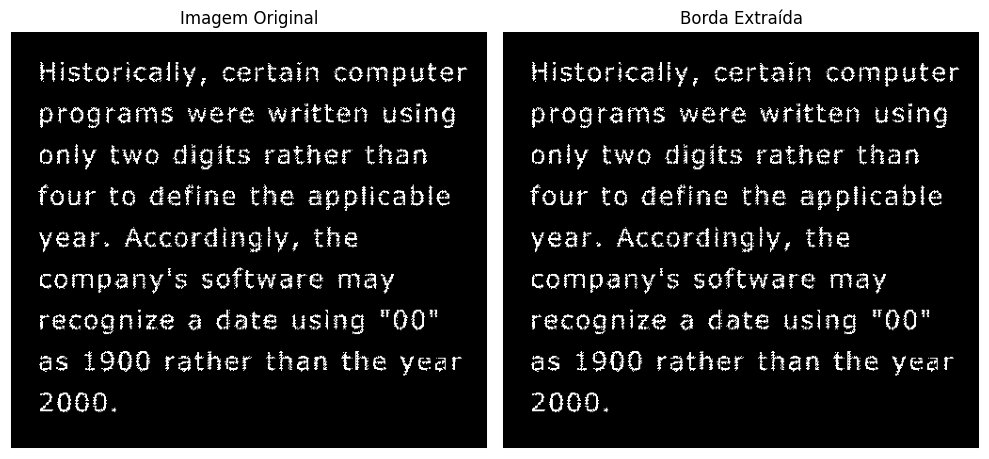

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregando a imagem h)
img_h = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 10 - Trabalho Morfologia/img/g.tif', cv2.IMREAD_GRAYSCALE)

# Elemento estruturante (se_disk)
se_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Erosão para extrair a borda
img_eroded = cv2.erode(img_h, se_disk)

# Subtraindo a imagem erodida da imagem original para obter a borda
img_border = cv2.subtract(img_h, img_eroded)

# Exibindo a imagem original e a borda extraída
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_h, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_border, cmap='gray')
plt.title('Borda Extraída')
plt.axis('off')

plt.tight_layout()
plt.show()